In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential, Input, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam,SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import DenseNet121
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

img_size=336
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0,
    width_shift_range=0.2,
    height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Augmented_Data/Splitted/train',  #training data path
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/Augmented_Data/Splitted/val', #validation data path
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

SIZE=336
channel=3


def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE,channel))
    x = Conv2D(3, (3, 3), padding='same')(input)
    x = densenet(x) 
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(5,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    #lr=0.002
    optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    #optimizer = SGD(lr=1e-5,momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

filepath = '/content/drive/MyDrive/cassava_dense121_run2.h5'   #path where the model should be saved
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint(filepath, verbose=1, save_best_only=True)

model = build_densenet()

Found 6000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.
29089792/29084464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 336, 336, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 336, 336, 3)       84        
_________________________________________________________________
densenet121 (Functional)     (None, None, None, 1024)  7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)   

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 50,
                   callbacks = [annealer,checkpoint])


Epoch 1/50
187/187 [==============================] - 2207s 12s/step - loss: 2.6442 - accuracy: 0.2162 - val_loss: 1.6364 - val_accuracy: 0.3410

Epoch 00001: val_loss improved from inf to 1.63638, saving model to /content/drive/MyDrive/cassava_dense121_run2.h5
Epoch 2/50
187/187 [==============================] - 234s 1s/step - loss: 2.1239 - accuracy: 0.3195 - val_loss: 1.3437 - val_accuracy: 0.4776

Epoch 00002: val_loss improved from 1.63638 to 1.34372, saving model to /content/drive/MyDrive/cassava_dense121_run2.h5
Epoch 3/50
187/187 [==============================] - 232s 1s/step - loss: 1.6530 - accuracy: 0.4558 - val_loss: 0.9635 - val_accuracy: 0.6495

Epoch 00003: val_loss improved from 1.34372 to 0.96349, saving model to /content/drive/MyDrive/cassava_dense121_run2.h5
Epoch 4/50
187/187 [==============================] - 232s 1s/step - loss: 1.4775 - accuracy: 0.5235 - val_loss: 0.8587 - val_accuracy: 0.6957

Epoch 00004: val_loss improved from 0.96349 to 0.85874, saving mod

Confusion Matrix
[[29  9  1  1  0]
 [ 0 40  0  0  0]
 [ 0  0 40  0  0]
 [ 0  0  0 40  0]
 [ 4  1  0  1 31]]
Normalized confusion matrix
              precision    recall  f1-score   support

         cbb       0.88      0.72      0.79        40
        cbsd       0.80      1.00      0.89        40
         cgm       0.98      1.00      0.99        40
         cmd       0.95      1.00      0.98        40
     healthy       1.00      0.84      0.91        37

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



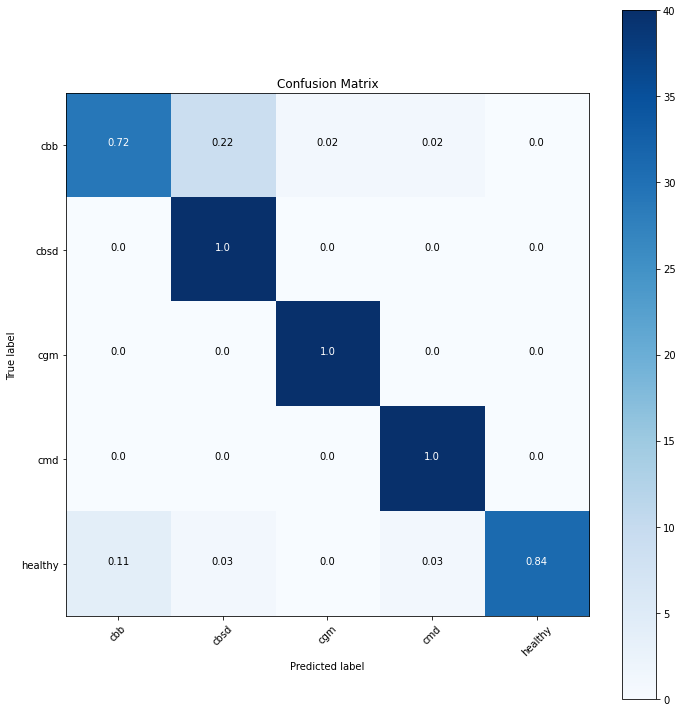

In [ ]:
y_pred1 = np.argmax(predict1, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred1)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
print(classification_report(test_generator.classes, y_pred1, target_names=target_names))

In [ ]:
!pip install flask-ngrok

In [ ]:
%mkdir templates -p
%mkdir static/css -p
%mkdir uploads -p


In [ ]:
li = ['Cassava Bacterial Blight','Cassava Brown Streak Disease','Cassava Green Mottle','Cassava Mossaic Disease','Healthy']
print(li)

['Cassava Bacterial Blight', 'Cassava Brown Streak Disease', 'Cassava Green Mottle', 'Cassava Mossaic Disease', 'Healthy']


In [ ]:
from __future__ import division, print_function

import sys
import os
import glob
import re
import numpy as np

from flask import Flask
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename


from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model
from keras.preprocessing import image

app = Flask(__name__)
run_with_ngrok(app) 

MODEL_PATH = '/content/drive/MyDrive/cassava_dense121_run2.h5'
model = load_model(MODEL_PATH)
print('Model loaded. Start serving...')

def model_predict(img_path, model):
  new_img = image.load_img(img_path, target_size=(336, 336))
  img = image.img_to_array(new_img)
  img = np.expand_dims(img, axis=0)
  img = img/255
  prediction = model.predict(img)
  d = prediction.flatten()
  j = d.max()
  li = ['Cassava Bacterial Blight','Cassava Brown Streak Disease','Cassava Green Mottle','Cassava Mossaic Disease','Healthy']
  for index,item in enumerate(d):
    if item == j:
        class_name = li[index]
  return class_name

@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')

@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = '/content/'
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        result = model_predict(file_path, model)
              # Convert to string
        return result
    return None


app.run()


Model loaded. Start serving...
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://76c19aa4e34a.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [08/Feb/2021 04:32:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2021 04:32:49] "GET /static/js/main.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2021 04:32:49] "GET /static/css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2021 04:32:52] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [08/Feb/2021 04:33:25] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2021 04:33:44] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2021 04:34:00] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [08/Feb/2021 04:34:13] "POST /predict HTTP/1.1" 200 -
